<a href="https://colab.research.google.com/github/Felipecl22/Portafolio-Ciencia-de-Datos/blob/main/An%C3%A1lisis_de_sobreviviente_Titanic_usando_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías necesarias

In [186]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Montar drive de Google

In [149]:
# Montando el drive para acceder a los archivos, ya que tengo los csv en mi Drive, esto no es necesario si ustedes tienen el archivo en su escritorio.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Carga de datos y análisis preliminar

In [150]:
# Cargar los datos
train_csv = '/content/drive/My Drive/Colab Notebooks/Prueba/train.csv'
test_csv = '/content/drive/My Drive/Colab Notebooks/Prueba/test.csv'

df_train = pd.read_csv(train_csv)
df_test = pd.read_csv(test_csv)

# Revisar datos
print(df_train.info())
print("\n")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   P

*   Las dataframe contienen tanto variables numéricas como categóricas.
*   Las dataframe contienen tipos de datos float64(2), int64(4), object(5)

In [151]:
print(f"Columnas de df_train: {df_train.columns}")
print(f"Nº de columnas en df_train: {len(df_train.columns)} columnas.")
print("\n")
print(f"Columnas de df_test: {df_test.columns}")
print(f"Nº de columnas en df_test: {len(df_test.columns)} columnas.")

Columnas de df_train: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Nº de columnas en df_train: 12 columnas.


Columnas de df_test: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Nº de columnas en df_test: 11 columnas.


*   La data de train contiene 891 entradas con 12 columnas.
*   La data de test contiene 418 entradas con 11 columnas.

La data test no contiene la columnas Survived.

In [152]:
print(df_train.head(2))
print("\n")
print(df_test.head(2))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C  


   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  


# Inspección de datos nulos

In [153]:
# Verificar valores nulos
print(f"Valores nulos en df_train son: \n{df_train.isnull().sum()}")
print("\n")
print(f"Valores nulos en df_test son: \n{df_test.isnull().sum()}")

Valores nulos en df_train son: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Valores nulos en df_test son: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Como podemos ver, ambas dataframes poseen valores nulos en un alto porcentaje, no es necesario realizar un código para darse cuenta que en Cabin en df_train con un total de 891 entradas tiene 687 nulas y lo mismo para df_test de 418 entradas 327 son nulas, esto es un problema ya que estas variables son importantes, por ello en vez de quitar estos valores es mejor imputarlos de alguna forma.

Primero que todo, vamos a ir por variable.

Age:

Dado que age no presenta un alto número de nulos, he tomado la decisión de imputar estos valores con la mediana, no la media porque puede existir una gran diferencia entre edades y eso crearía un sesgo en el modelo.

In [154]:
print(df_train['Age'].max())
print(df_train['Age'].min())

80.0
0.42


In [155]:
# Imputar valores nulos
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_test['Age'].fillna(df_train['Age'].median(), inplace=True)

Cabin:

Dado que esta columna presenta una gran cantidad de valores nulos, creo que no debería imputar los valores nulos, dado que crearía un sesgo importante en el modelo, esto por que muchos valores no serían representativos de la data original y las predicciones serían poco acertadas, por ello he decidido quitar esta columna del modelo.

Asimismo, vamos a quitar otras columnas que no aportar valor al modelo.

In [156]:
df_train.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)
df_test.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

Vamos a dar un vistazo a la data, para visualizar los cambios hasta ahora.

In [157]:
print(df_train.info())
print("\n")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 n

Como podemos ver, ahora en las dataframe ya no están presentes las columnas de no interés para nuestros modelos futuros.

Fare y Embarked:

Dado a que Fare tiene 1 nulo y Embarked 2 nulos, la mejor decisión es imputar estos valores.

In [158]:
# Imputar valores nulos en 'Embarked' con la moda, se utiliza [0] en caso de tener otros valores más de moda, soló elegimos el primero de ellos.
embarked_mode_train = df_train['Embarked'].mode()[0]
# Imputar valores nulos en 'Embarked' del conjunto de entrenamiento
df_train['Embarked'].fillna(embarked_mode_train, inplace=True)

# Calcular la moda de 'Embarked' en el conjunto de prueba
embarked_mode_test = df_test['Embarked'].mode()[0]
# Imputar valores nulos en 'Embarked' del conjunto de prueba
df_test['Embarked'].fillna(embarked_mode_test, inplace=True)

# Calcular la mediana de 'Fare' en el conjunto de entrenamiento
fare_median_train = df_train['Fare'].median()
# Imputar valores nulos en 'Fare' del conjunto de entrenamiento
df_train['Fare'].fillna(fare_median_train, inplace=True)

# Calcular la mediana de 'Fare' en el conjunto de prueba
fare_median_test = df_test['Fare'].median()
# Imputar valores nulos en 'Fare' del conjunto de prueba
df_test['Fare'].fillna(fare_median_test, inplace=True)

Damos un vistazo a las dataframe, luego de haber realizado todos los cambios necesarios.

In [159]:
# Verificar valores nulos
print(f"Valores nulos en df_train son: \n{df_train.isnull().sum()}")
print(df_train.shape)
print("\n")
print(f"Valores nulos en df_test son: \n{df_test.isnull().sum()}")
print(df_test.shape)

Valores nulos en df_train son: 
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
(891, 8)


Valores nulos en df_test son: 
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
(418, 7)


# Gráficos

<Axes: xlabel='Sex', ylabel='Survived'>

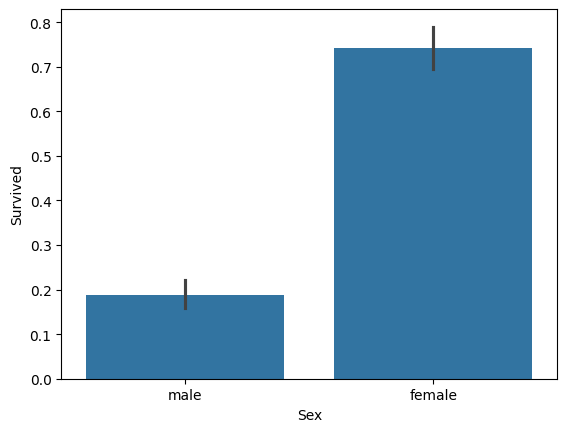

In [160]:
# Gráfico 1: Supervivencia por columna "Sex".
sns.barplot(x="Sex", y="Survived", data=df_train)

In [161]:
# Contar el total de supervivientes y el total por cada sexo
total_por_sexo = df_train.groupby('Sex').size()
total_supervivientes_por_sexo = df_train[df_train['Survived'] == 1].groupby('Sex').size()

# Calcular el porcentaje de supervivencia por sexo
Porcentaje_de_supervivencia_por_sex = (total_supervivientes_por_sexo / total_por_sexo) * 100

# Redondear a dos decimales y mostrar los resultados
print(Porcentaje_de_supervivencia_por_sex.round(2))

Sex
female    74.20
male      18.89
dtype: float64


<Axes: xlabel='Pclass', ylabel='Survived'>

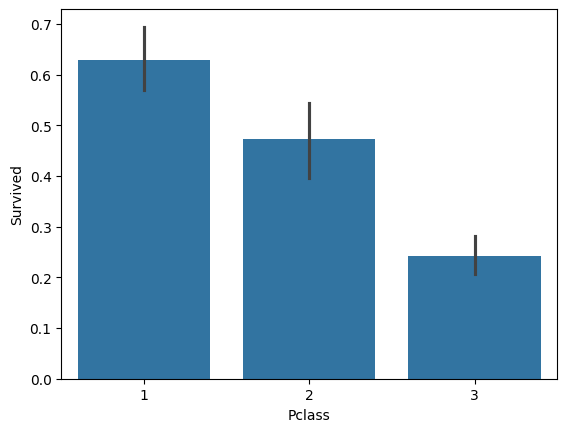

In [162]:
# Gráfico 2: Distribución de clases
sns.barplot(x="Pclass", y="Survived", data=df_train)

In [163]:
# Contar el total de pasajeros y supervivientes por clase
total_por_clase = df_train.groupby('Pclass').size()
total_supervivientes_por_clase = df_train[df_train['Survived'] == 1].groupby('Pclass').size()

# Calcular el porcentaje de supervivencia por clase
Porcentaje_de_supervivencia_por_clase = (total_supervivientes_por_clase / total_por_clase) * 100

print(Porcentaje_de_supervivencia_por_clase)

Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64


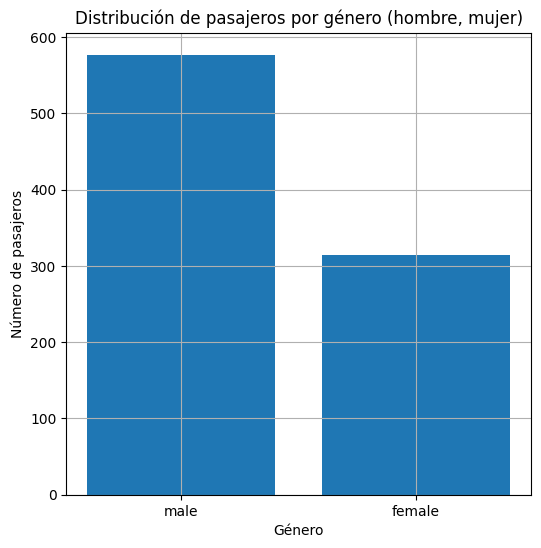

Sex
male      577
female    314
Name: count, dtype: int64


In [164]:
# Gráfico 3: Distribución de "Sex"
conteo_genero = df_train["Sex"].value_counts()
plt.figure(figsize=(6, 6))
plt.bar(conteo_genero.index, conteo_genero.values)
plt.xlabel("Género")
plt.ylabel("Número de pasajeros")
plt.title("Distribución de pasajeros por género (hombre, mujer)")
plt.grid(True)
plt.show()

# Cantidad de Hombres y Mujeres en la dataframe.
gender_counts = df_train['Sex'].value_counts()
print(gender_counts)

Conclusiones:

Podemos ver que la dataframe muestra que hubo más Hombres (577) que Hujeres (314) y que la supervivencia fue muy dispar entre ellos, Hombre un 18.89% y Mujeres 74.20%, lo cual demuestra que se dio prioridad probablemente a las mujeres para utilzar los botes salvavidas. También, vemos que las personas de primera clase (Pclass 1) tuvieron una tasa de supervivencia significativamente mayor en comparación con las de segunda y tercera clase.

# Machine Learning

Antes de comenzar con el modelo lo primero es dividir la data en entrenamiento y prueba, para vamos solamentea utilizar el df_train, dado que posteriormente usaremos df_test para realizar predicciones. Por otro lado, vamos divir los datos en 80/20.

In [165]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [166]:
# X son las variables predictoras
# y es la variable objetivo

X = df_train.drop(['Survived'], axis=1)
y = df_train[["Survived"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [167]:
print(X.columns)
print(y.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')
Index(['Survived'], dtype='object')


Vamos a verificar que variables son categóricas y númericas, dado que necesitamos realizar un escalado de la data númerica y un encoding de las categóricas.

In [168]:
# Verificar por variables categóricas, lo mismo aplica para df_test.

categoricas = []

for var in X:
    if X[var].dtype == 'O':
        categoricas.append(var)

print(f'Hay {len(categoricas)} variables categóricas en x')
print(f'Estas son: {categoricas}')

Hay 2 variables categóricas en x
Estas son: ['Sex', 'Embarked']


In [169]:
# Verificar por variables numéricas, lo mismo aplica para df_test.

numericas = []

for var in X:
    if X[var].dtype != 'O':
        numericas.append(var)

print(f'Hay {len(numericas)} variables numéricas en X')
print(f'Estas son: {numericas}')

Hay 5 variables numéricas en X
Estas son: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Encoding categóricas

In [170]:
# Convertir variables categóricas en variables dummy
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Sex', 'Embarked'], drop_first=True)

Escalado de variables númericas

In [171]:
# Separar variables numéricas
num_vars = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

# Transformar los datos de prueba usando el mismo escalador
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [172]:
print(X_train.columns)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


In [173]:
df_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

Modelo Naive Bayes

In [174]:
# Inicializar el modelo Naïve Bayes
model_nb = GaussianNB()

# Entrenar el modelo
model_nb.fit(X_train, y_train.values.ravel())

# Realizar predicciones en el conjunto de prueba
y_pred_nb = model_nb.predict(X_test)

# Evaluar el rendimiento
print("Naïve Bayes - Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naïve Bayes - Classification Report:\n", classification_report(y_test, y_pred_nb))

Naïve Bayes - Accuracy: 0.770949720670391
Naïve Bayes - Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       105
           1       0.72      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



Regresión logística

In [187]:
# Inicializar el modelo de Regresión Logística
model_lr = LogisticRegression(max_iter=1000)  # Puedes ajustar el número de iteraciones si es necesario

# Entrenar el modelo
model_lr.fit(X_train, y_train.values.ravel())

# Realizar predicciones en el conjunto de prueba
y_pred_lr = model_lr.predict(X_test)

# Evaluar el rendimiento
print("Regresión Logística - Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Regresión Logística - Classification Report:\n", classification_report(y_test, y_pred_lr))

Regresión Logística - Accuracy: 0.8100558659217877
Regresión Logística - Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



Conclusiones:

En base en los resultados, la regresión logística tiene un rendimiento mejor en comparación con el modelo de Naïve Bayes.

Dado que:

Accuracy: La regresión logística tiene una precisión de 0.81, mientras que Naïve Bayes tiene una precisión de 0.77. Esto significa que la regresión logística clasifica correctamente más instancias en el conjunto de prueba.

Precision y Recall: La regresión logística también tiene una mayor precisión y recall para la clase 0 (no sobrevivientes) y una precisión y recall relativamente comparable para la clase 1 (sobrevivientes) en comparación con Naïve Bayes.

Esto sugiere que la regresión logística puede estar capturando mejor las relaciones entre las variables en tu conjunto de datos.

# Testeo con data de prueba

Vamos a utilizar la data df_test para realizar predicciones como si fuera nueva data, solamente utilizando 1 de los 2 modelos creados, ya que es el mismo procedimiento.

In [176]:
df_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

Encoding categóricas

In [177]:
# Codificar variables categóricas en df_test usando las mismas columnas que en X_train
df_test_encoded = pd.get_dummies(df_test, columns=['Sex', 'Embarked'], drop_first=True)

# Alinear columnas de df_test con las de X_train
df_test_encoded = df_test_encoded.reindex(columns=X_train.columns, fill_value=0)


Escalado de variables númericas

In [178]:
# Separar variables numéricas
num_vars = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Escalar los datos de df_test usando el mismo escalador que se usó para X_train
df_test_encoded[num_vars] = scaler.transform(df_test_encoded[num_vars])


In [182]:
# Realizar predicciones en df_test_encoded
y_pred_test = model_nb.predict(df_test_encoded)

# Realizar predicciones
y_pred_test = model_nb.predict(df_test_encoded)

# Mostrar las predicciones
print(y_pred_test)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]


In [183]:
# Contar las predicciones
y_pred_df = pd.DataFrame(y_pred_test, columns=['Predicted_Survived'])
pred_counts = y_pred_df['Predicted_Survived'].value_counts()

print("Contador de predicciones:")
print(pred_counts)


Contador de predicciones:
Predicted_Survived
0    245
1    173
Name: count, dtype: int64


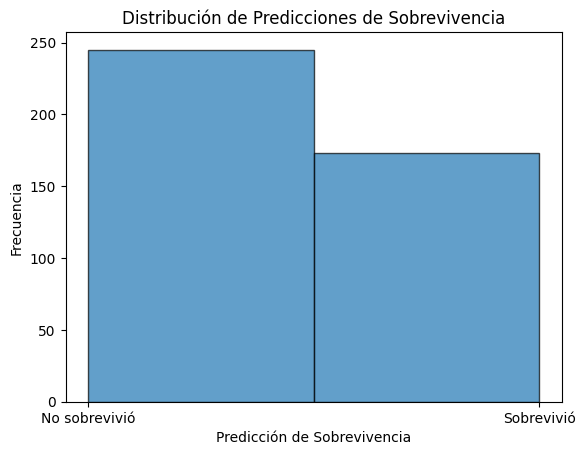

In [184]:
plt.hist(y_pred_test, bins=2, edgecolor='black', alpha=0.7)
plt.xticks([0, 1], ['No sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción de Sobrevivencia')
plt.ylabel('Frecuencia')
plt.title('Distribución de Predicciones de Sobrevivencia')
plt.show()

Esto significa que, de las 418 predicciones que el modelo ha hecho en df_test_encoded, la mayoría de los pasajeros han sido clasificados como no sobrevivientes (245 veces) y una cantidad menor como sobrevivientes (173 veces).

Dado que que df_test no contiene las etiquetas no se puede calcular la accuracy, pero si pudimos obtener las predicciones.